# skimage

## visualization

参考：  
https://www.kaggle.com/code/voglinio/from-masks-to-bounding-boxes/notebook

In [11]:
import cv2
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

Found bbox [2071, 299, 2415, 555]
Found bbox [3555, 407, 3656, 459]
Found bbox [2940, 429, 3037, 502]
Found bbox [1645, 545, 1663, 567]


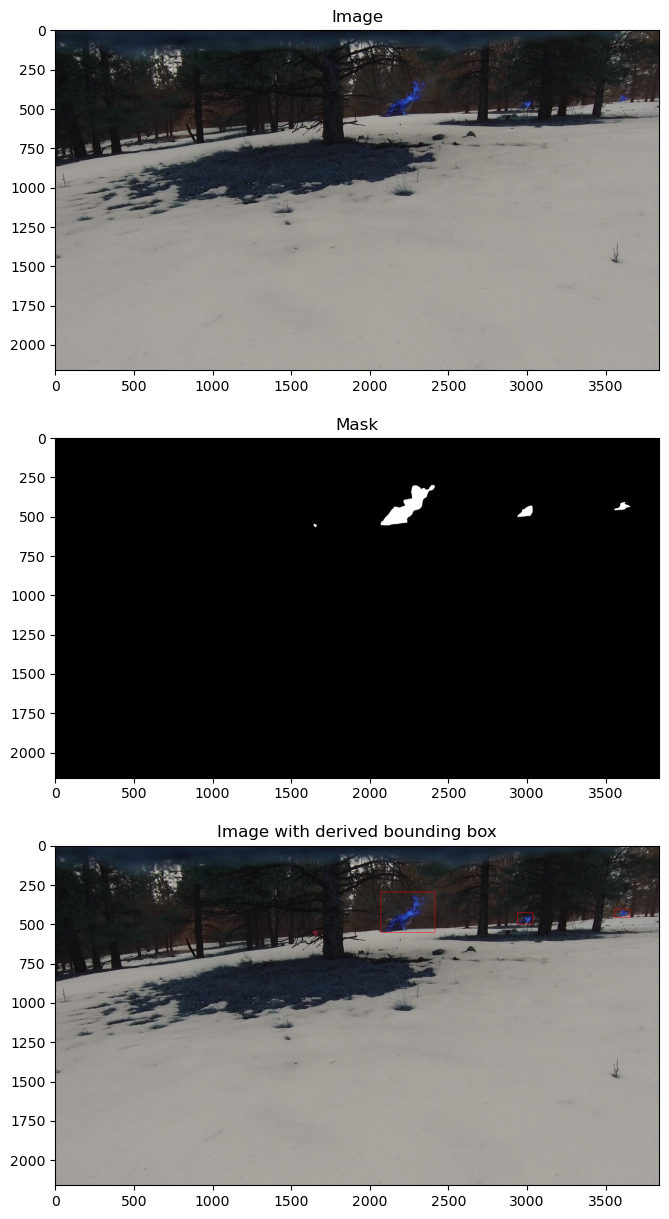

In [12]:
imageIndex = 0

imagePath = '../Images/image_{}.jpg'.format(imageIndex)
maskPath = '../Masks/image_{}.png'.format(imageIndex)

imageArray = cv2.imread(imagePath)
maskArray = cv2.imread(maskPath)

bbox = [0, 0, 0, 0]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 15))
lbl = label(maskArray)
props = regionprops(lbl)
imageCopy = imageArray.copy()
for prop in props:
    bbox[0] = prop.bbox[1]
    bbox[1] = prop.bbox[0]
    bbox[2] = prop.bbox[4]
    bbox[3] = prop.bbox[3]
    print('Found bbox', bbox)
    cv2.rectangle(imageCopy, (prop.bbox[1], prop.bbox[0]), (prop.bbox[4], prop.bbox[3]), (255, 0, 0), 2)

ax1.imshow(imageArray)
ax1.set_title('Image')
ax2.set_title('Mask')
ax3.set_title('Image with derived bounding box')
ax2.imshow(maskArray[...,0], cmap='gray')
ax3.imshow(imageCopy)
plt.show()